In [1]:
# 3.12 Loading the Reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
# 3.13 Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
train_labels[0]

3

In [7]:
# Encoding the data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
    
one_hot_train_labels = to_one_hot(train_labels)
one_host_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical
    
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
# 3.15 Model delinition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
#3.16 Compiling the model

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# 3.17 Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
# 3.18 Training the model

history = model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 246us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.4451 - acc: 0.6878 - val_loss: 1.3456 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.0952 - acc: 0.7652 - val_loss: 1.1710 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.8695 - acc: 0.8158 - val_loss: 1.0782 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.7030 - acc: 0.8479 - val_loss: 0.9844 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.5661 - acc: 0.8801 - val_loss: 0.9419 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.4574 - acc: 0.9049 - val_loss: 0.9085 - val_acc: 0.8020
Epoch

In [15]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

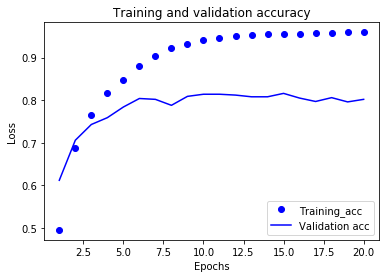

In [16]:
# Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training_acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
# 3.21 Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 171us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 89us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 89us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 89us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 89us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 89us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 89us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
798

In [18]:
results

[1.0227966242779183, 0.7756010686194165]

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [26]:
# 3.22 Generating predictions for new data
predictions = model.predict(x_test)

predictions[0].shape # Each entry in predictions is a vector of length 46

(46,)

In [27]:
np.sum(predictions[0]) # The coefficients in this vector sum to 1

1.0000001

In [28]:
np.argmax(predictions[0]) # The largest entry is the predicted class-the class with the highest probablity

3